In [4]:
import pandas as pd
data = pd.read_csv("passengers.csv")

In [5]:
data.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


In [7]:
data.shape

(887, 8)

In [10]:
data['Sex'] = data['Sex'].map({"male": 0, "female": 1})

In [11]:
data['Fare'] = data['Fare'].astype(int)

In [13]:
data['Age'] = data['Age'].astype(int)

In [14]:
data = data.drop(['Name'], axis=1)

In [15]:
data

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,0,22,1,0,7
1,1,1,1,38,1,0,71
2,1,3,1,26,0,0,7
3,1,1,1,35,1,0,53
4,0,3,0,35,0,0,8
...,...,...,...,...,...,...,...
882,0,2,0,27,0,0,13
883,1,1,1,19,0,0,30
884,0,3,1,7,1,2,23
885,1,1,0,26,0,0,30


In [17]:
from sklearn.model_selection import train_test_split
#for split the data
y = data['Survived']
X = data.drop(['Survived'], axis=1).values 
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.2, random_state= 10)

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), activation='relu', solver='sgd', max_iter=1000)
mlp.fit(X_train, y_train.values.ravel())

MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000, solver='sgd')

In [20]:
predictions = mlp.predict(X_test)

In [23]:
print("Survived", sum(predictions!=0))
print("NOT Survived", sum(predictions==0))

Survived 56
NOT Survived 122


array([[100,  12],
       [ 22,  44]])

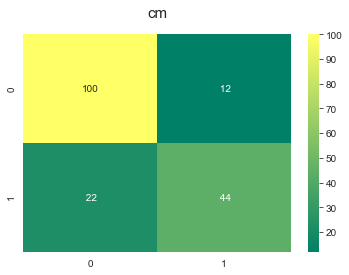

In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix #for confusion matrix
cm = confusion_matrix(y_test,predictions)
#visualize confusion matrix 
sns.heatmap(confusion_matrix(y_test,predictions),annot=True,fmt='3.0f',cmap="summer")
plt.title('cm', y=1.05, size=15)
cm